In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [2]:
# Load dataset.
X_train = pd.read_csv('./csvs/train.csv') # training data
y_train = X_train.pop('death')

X_train

,location,country,gender,age
0,Haneda,Japan,female,25
1,Nagoya City,Japan,female,25
2,Kumamoto City,Japan,female,25
3,Hokkaido,Japan,female,25
4,Hokkaido,Japan,female,25
...,...,...,...,...
824,South Korea,South Korea,male,24
825,South Korea,South Korea,male,24
826,Wan Chai,Hong Kong,male,24
827,Hong Kong,Hong Kong,male,24


In [3]:
X_train_cat = X_train.select_dtypes(include=['object']).copy()
X_train_cat

,location,country,gender
0,Haneda,Japan,female
1,Nagoya City,Japan,female
2,Kumamoto City,Japan,female
3,Hokkaido,Japan,female
4,Hokkaido,Japan,female
...,...,...,...
824,South Korea,South Korea,male
825,South Korea,South Korea,male
826,Wan Chai,Hong Kong,male
827,Hong Kong,Hong Kong,male


In [4]:
X_train_cat['gender'] = X_train_cat['gender'].astype('category')
X_train_cat['country'] = X_train_cat['country'].astype('category')
X_train_cat['location'] = X_train_cat['location'].astype('category')
X_train_cat['gender'] = X_train_cat['gender'].cat.codes
X_train_cat['country'] = X_train_cat['country'].cat.codes
X_train_cat['location'] = X_train_cat['location'].cat.codes
X_train_cat

,location,country,gender
0,25,9,0
1,67,9,0
2,48,9,0
3,32,9,0
4,32,9,0
...,...,...,...
824,93,15,1
825,93,15,1
826,110,7,1
827,33,7,1


In [5]:
X_temp = X_train.drop(['location','country','gender'],axis='columns')
result = pd.concat([X_temp, X_train_cat],axis=1)
result

,age,location,country,gender
0,25,25,9,0
1,25,67,9,0
2,25,48,9,0
3,25,32,9,0
4,25,32,9,0
...,...,...,...,...
824,24,93,15,1
825,24,93,15,1
826,24,110,7,1
827,24,33,7,1


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result, y_train, test_size=0.33, random_state=42)

In [8]:
model = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=42)

In [9]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [10]:
model.oob_score_

0.4676493576752281

In [11]:
y_oob = model.oob_prediction_
print(roc_auc_score(y_train,y_oob))

0.8903005321924241


In [12]:
model.predict([[60,19,8,1]])

array([0.03425])

[0.19530331 0.63831184 0.13000882 0.03637603]


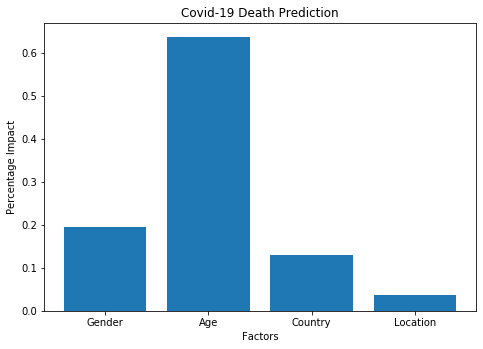

In [28]:
print(model.feature_importances_)


x1=['Gender','Age','Country','Location']
y1=model.feature_importances_

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x1,y1)
plt.title('Covid-19 Death Prediction')
plt.xlabel('Factors')
plt.ylabel('Percentage Impact')
plt.show()

In [13]:
y_pred = model.predict(X_test)
y_pred

array([3.00000000e-03, 1.00000000e+00, 1.00000000e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.00000000e-03, 4.00000000e-03,
       6.77416667e-01, 2.66666667e-03, 0.00000000e+00, 0.00000000e+00,
       2.28000000e-01, 0.00000000e+00, 0.00000000e+00, 1.96666667e-02,
       7.00000000e-03, 6.77416667e-01, 1.94767316e-02, 0.00000000e+00,
       0.00000000e+00, 1.10000000e-02, 1.00000000e-03, 0.00000000e+00,
       1.00000000e-03, 4.35000000e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.96000000e-01, 0.00000000e+00, 2.50000000e-04,
       0.00000000e+00, 7.26190476e-04, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.20000000e-02,
       0.00000000e+00, 1.90000000e-02, 0.00000000e+00, 1.07000000e-01,
       4.45421429e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.37000000e-01, 8.60000000e-02,
       3.10000000e-02, 0.00000000e+00, 1.30000000e-02, 4.00000000e-03,
      

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [21]:
df1 = df.head(5)
df1

,Actual,Predicted
608,0,0.003
457,1,1.000
290,0,0.001
558,0,0.000
168,0,0.000


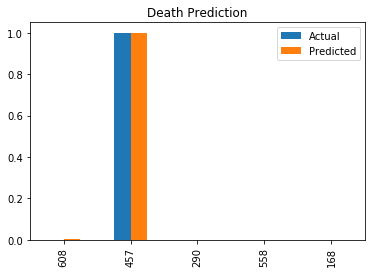

In [39]:
df1.plot(kind='bar',title='Death Prediction')